# Crime

# Boilerplate

In [60]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

import pylab as pl
import seaborn as sns

mpl.style.use('fivethirtyeight')
%matplotlib inline

# Read the Data

In [61]:
df=pd.read_csv('Sample_Crime_Incident_Reports_Cleaned01.csv',low_memory=False).dropna()

In [62]:
df[:5]

,Order,Random,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,Date_from,Time_From,WEAPONTYPE,...,Year,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location 1,Location 2
5,6,0.000020,PROP,PropFound,PropFound,SouthEnd,0.0,5/5/2015,19:00,Unarmed,...,2015.0,5.0,Tuesday,Part three,769088.4841,2952796.738,FAIRFIELD ST,NEWBURY ST,42.349866,-71.08226
17,18,0.000043,MVINV,TOWED,TOWED,SouthEnd,168.0,3/27/2013,10:00,Unarmed,...,2013.0,3.0,Wednesday,Part three,771892.6392,2948300.850,HARRISON AV,E NEWTON ST,42.337491,-71.07197
27,28,0.000075,STOLMV,AUTO THEFT,07xx,Dorchester,338.0,9/13/2013,19:00,Unarmed,...,2013.0,9.0,Friday,Part One,774479.6728,2938368.786,WINTER ST,HANCOCK ST,42.310201,-71.06259
28,29,0.000082,ARREST,VAL,VAL,Mattapan,0.0,3/31/2015,2:20,Unarmed,...,2015.0,3.0,Tuesday,Part Two,766614.8591,2924022.545,FREMONT ST,FAUNCE RD,42.270941,-71.09192
51,52,0.000226,MVARPT,VAL,VAL,JamaicaPlain,642.0,9/6/2012,8:25,Unarmed,...,2012.0,9.0,Thursday,Part Two,760463.7384,2938789.497,CENTRE ST,BURROUGHS ST,42.311541,-71.11440


In [63]:
df.describe()

,Random,REPORTINGAREA,Year,Month,X,Y,Location 1,Location 2
count,36005.000000,36005.000000,36005.000000,36005.000000,36005.000000,3.600500e+04,36005.000000,36005.000000
mean,0.399752,231.176253,2013.410915,6.698070,769379.489275,2.944306e+06,42.326560,-71.081332
std,0.231764,253.535910,0.920449,3.352684,7701.740663,1.077475e+04,0.029528,0.028554
min,0.000020,0.000000,2012.000000,1.000000,743774.364400,2.910135e+06,42.232961,-71.176265
25%,0.197826,0.000000,2013.000000,4.000000,765846.969500,2.936531e+06,42.305241,-71.094410
50%,0.400252,146.000000,2013.000000,7.000000,770489.127100,2.945946e+06,42.331061,-71.077290
75%,0.599328,373.000000,2014.000000,10.000000,774551.713400,2.952849e+06,42.350061,-71.062110
max,0.800091,961.000000,2015.000000,12.000000,798964.047700,2.969005e+06,42.394221,-70.972049


# ## Transforming the Original Data Using a Mapped Dictionary

In [64]:
#creating a remapped shooting variable
df['Shoot_Status']=df['Shooting'].map({'No':0,'Yes':1}).astype(int)

In [65]:
df[:5]

,Order,Random,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,Date_from,Time_From,WEAPONTYPE,...,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location 1,Location 2,Shoot_Status
5,6,0.000020,PROP,PropFound,PropFound,SouthEnd,0.0,5/5/2015,19:00,Unarmed,...,5.0,Tuesday,Part three,769088.4841,2952796.738,FAIRFIELD ST,NEWBURY ST,42.349866,-71.08226,0
17,18,0.000043,MVINV,TOWED,TOWED,SouthEnd,168.0,3/27/2013,10:00,Unarmed,...,3.0,Wednesday,Part three,771892.6392,2948300.850,HARRISON AV,E NEWTON ST,42.337491,-71.07197,0
27,28,0.000075,STOLMV,AUTO THEFT,07xx,Dorchester,338.0,9/13/2013,19:00,Unarmed,...,9.0,Friday,Part One,774479.6728,2938368.786,WINTER ST,HANCOCK ST,42.310201,-71.06259,0
28,29,0.000082,ARREST,VAL,VAL,Mattapan,0.0,3/31/2015,2:20,Unarmed,...,3.0,Tuesday,Part Two,766614.8591,2924022.545,FREMONT ST,FAUNCE RD,42.270941,-71.09192,0
51,52,0.000226,MVARPT,VAL,VAL,JamaicaPlain,642.0,9/6/2012,8:25,Unarmed,...,9.0,Thursday,Part Two,760463.7384,2938789.497,CENTRE ST,BURROUGHS ST,42.311541,-71.11440,0


In [66]:
main_crimecode_dummies=pd.get_dummies(df['MAIN_CRIMECODE'], prefix='class').iloc[:, 1:]
list(main_crimecode_dummies.columns.values)

['class_01xx',
 'class_03xx',
 'class_04xx',
 'class_05CB',
 'class_05RB',
 'class_06MV',
 'class_06xx',
 'class_07RV',
 'class_07xx',
 'class_08xx',
 'class_09xx',
 'class_10xx',
 'class_11xx',
 'class_12xx',
 'class_13xx',
 'class_14xx',
 'class_15xx',
 'class_16xx',
 'class_18xx',
 'class_20xx',
 'class_21xx',
 'class_22xx',
 'class_24xx',
 'class_32GUN',
 'class_Argue',
 'class_Arrest',
 'class_BENoProp',
 'class_Ballist',
 'class_Bomb',
 'class_BurgTools',
 'class_Explos',
 'class_FIRE',
 'class_Gather',
 'class_Harass',
 'class_Harbor',
 'class_Hazardous',
 'class_InvPer',
 'class_InvProp',
 'class_InvVeh',
 'class_LICViol',
 'class_Labor',
 'class_Landlord',
 'class_MVAcc',
 'class_Manslaug',
 'class_MedAssist',
 'class_OTHER',
 'class_PRISON',
 'class_PersLoc',
 'class_PersMiss',
 'class_PhoneCalls',
 'class_Plates',
 'class_PropDam',
 'class_PropFound',
 'class_PropLost',
 'class_PubDrink',
 'class_Restrain',
 'class_Runaway',
 'class_SearchWarr',
 'class_Service',
 'class_Sex

In [67]:
reporting_district_dummies=pd.get_dummies(df['REPTDISTRICT'], prefix='class').iloc[:, 1:]
list(reporting_district_dummies.columns.values)

['class_Dorchester',
 'class_Downtown',
 'class_Downtown5',
 'class_EastBoston',
 'class_HydePark',
 'class_JamaicaPlain',
 'class_Mattapan',
 'class_Roxbury',
 'class_SouthBoston',
 'class_SouthEnd',
 'class_WestRoxbury']

In [68]:
data=df.join([main_crimecode_dummies,reporting_district_dummies])
data[:5]

,Order,Random,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,Date_from,Time_From,WEAPONTYPE,...,class_Downtown,class_Downtown5,class_EastBoston,class_HydePark,class_JamaicaPlain,class_Mattapan,class_Roxbury,class_SouthBoston,class_SouthEnd,class_WestRoxbury
5,6,0.000020,PROP,PropFound,PropFound,SouthEnd,0.0,5/5/2015,19:00,Unarmed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,18,0.000043,MVINV,TOWED,TOWED,SouthEnd,168.0,3/27/2013,10:00,Unarmed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27,28,0.000075,STOLMV,AUTO THEFT,07xx,Dorchester,338.0,9/13/2013,19:00,Unarmed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,29,0.000082,ARREST,VAL,VAL,Mattapan,0.0,3/31/2015,2:20,Unarmed,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51,52,0.000226,MVARPT,VAL,VAL,JamaicaPlain,642.0,9/6/2012,8:25,Unarmed,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Linear Regression through Ordinary Least Squares

In [69]:
model = ols(data=data, formula='Shoot_Status~class_Dorchester+class_Downtown+class_Downtown5+class_EastBoston+class_HydePark+class_JamaicaPlain+class_Mattapan+class_Roxbury+class_SouthBoston+class_SouthEnd+class_WestRoxbury')
result = model.fit()

In [70]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Shoot_Status   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.542
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           5.30e-11
Time:                        06:18:05   Log-Likelihood:                 51395.
No. Observations:               36005   AIC:                        -1.028e+05
Df Residuals:                   35993   BIC:                        -1.027e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept          -2.302e-17      0.001  -1.89e-14      1.000        -0.002     0.002
class_Dorchester       0.0064      0.002      4.238      0.000         0.003     0.009
class_Downtown         0.0009      0.001      0.574      0.566        -0.002     0.004
class_Downtown5        0.0033      0.003      1.235      0.217        -0.002     0.008
class_EastBoston       0.0018      0.002      0.966      0.334        -0.002     0.005
class_HydePark     -3.889e-18      0.002  -1.92e-15      1.000        -0.004     0.004
class_JamaicaPlain     0.0039      0.002      2.290      0.022         0.001     0.007
class_Mattapan         0.0074      0.002      4.567      0.000         0.004     0.011
class_Roxbury          0.0060      0.001      4.261      0.000         0.003     0.009
class_SouthBoston      0.0011      0.002      0.679      0.497        -0.002     0.004
class_SouthEnd         0.0023      0.001      1.597      0.110        -0.001     0.005
class_WestRoxbury   9.428e-19      0.002   4.66e-16      1.000        -0.004     0.004
==============================================================================
Omnibus:                    72491.951   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127010546.371
Skew:                          17.040   Prob(JB):                         0.00
Kurtosis:                     291.964   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

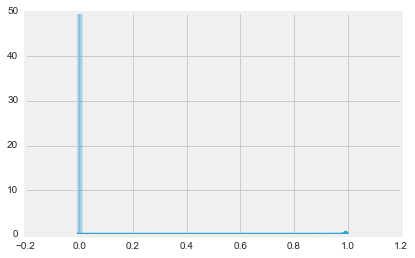

In [71]:
residuals=result.resid
sns.distplot(residuals)

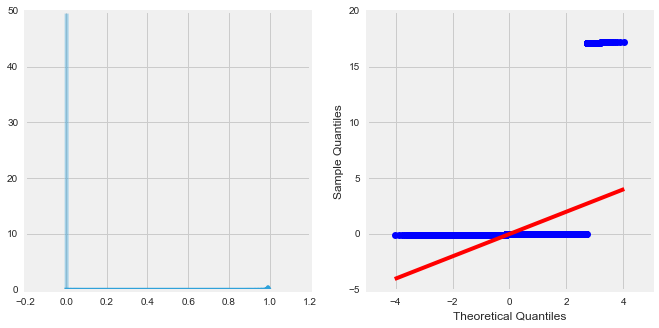

In [72]:
# Checking the residuals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.distplot(residuals, ax=axes[0]);
sm.qqplot(residuals, fit=True, line='s', ax=axes[1]);

## So only in District Dorchester, Mattapan, Roxbury, and HTU have a statistical significance as far as shooting is concerned

In [73]:
model = ols(data=data, formula='Shoot_Status~class_Dorchester+class_Mattapan+class_Roxbury')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Shoot_Status   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.76
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           1.96e-13
Time:                        06:18:06   Log-Likelihood:                 51391.
No. Observations:               36005   AIC:                        -1.028e+05
Df Residuals:                   36001   BIC:                        -1.027e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.0015      0.000      3.915      0.000         0.001     0.002
class_Dorchester     0.0049      0.001      5.018      0.000         0.003     0.007
class_Mattapan       0.0059      0.001      5.186      0.000         0.004     0.008
class_Roxbury        0.0045      0.001      5.515      0.000         0.003     0.006
==============================================================================
Omnibus:                    72505.377   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127150264.874
Skew:                          17.047   Prob(JB):                         0.00
Kurtosis:                     292.124   Cond. No.                         4.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Testing

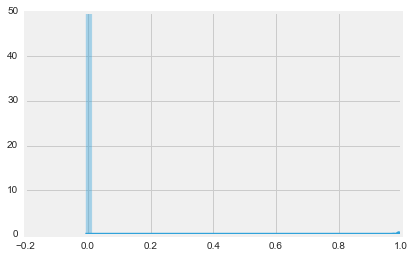

In [74]:
residuals=result.resid
sns.distplot(residuals)

## Linear Regression through Ordinary Least Squares based on Main Crime Code

In [75]:
model = ols(data=data, formula='Shoot_Status~class_01xx +class_03xx +class_04xx +class_05CB +class_05RB +class_06MV +class_06xx +class_07RV+class_07xx +class_08xx +class_09xx +class_10xx +class_11xx +class_12xx +class_13xx + class_14xx +class_15xx +class_16xx +class_18xx +class_20xx +class_21xx +class_22xx +class_24xx +class_32GUN +class_Argue +class_Arrest +class_BENoProp +class_Ballist +class_Bomb + class_BurgTools +class_Explos +class_FIRE +class_Gather +class_Harass +class_Harbor +class_Hazardous +class_InvPer +class_InvProp +class_InvVeh +class_LICViol +class_Labor +class_Landlord +class_MVAcc+class_Manslaug +class_MedAssist +class_OTHER +class_PRISON +class_PersLoc +class_PersMiss +class_PhoneCalls +class_Plates +class_PropDam +class_PropFound +class_PropLost +class_PubDrink +class_Restrain +class_Runaway +class_SearchWarr +class_Service +class_SexReg +class_SkipFare +class_TOWED +class_TRESPASS +class_VAL')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Shoot_Status   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     155.6
Date:                Sat, 23 Apr 2016   Prob (F-statistic):               0.00
Time:                        06:18:07   Log-Likelihood:                 55762.
No. Observations:               36005   AIC:                        -1.114e+05
Df Residuals:                   35940   BIC:                        -1.108e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         2.679e-15      0.010    2.6e-13      1.000        -0.020     0.020
class_01xx           1.0000      0.016     60.685      0.000         0.968     1.032
class_03xx           0.0025      0.010      0.236      0.813        -0.018     0.023
class_04xx           0.1067      0.010     10.227      0.000         0.086     0.127
class_05CB        -2.74e-15      0.014  -2.01e-13      1.000        -0.027     0.027
class_05RB       -2.952e-15      0.012  -2.47e-13      1.000        -0.023     0.023
class_06MV       -2.726e-15      0.010  -2.63e-13      1.000        -0.020     0.020
class_06xx       -2.629e-15      0.010  -2.53e-13      1.000        -0.020     0.020
class_07RV       -3.445e-15      0.011  -3.04e-13      1.000        -0.022     0.022
class_07xx       -2.637e-15      0.011  -2.51e-13      1.000        -0.021     0.021
class_08xx           0.0005      0.010      0.051      0.959        -0.020     0.021
class_09xx         2.48e-15      0.052   4.73e-14      1.000        -0.103     0.103
class_10xx       -3.585e-15      0.015  -2.44e-13      1.000        -0.029     0.029
class_11xx       -2.715e-15      0.011  -2.51e-13      1.000        -0.021     0.021
class_12xx        -4.83e-15      0.038  -1.28e-13      1.000        -0.074     0.074
class_13xx        -2.73e-15      0.011  -2.49e-13      1.000        -0.021     0.021
class_14xx       -2.693e-15      0.010  -2.59e-13      1.000        -0.020     0.020
class_15xx       -2.308e-15      0.011  -2.15e-13      1.000        -0.021     0.021
class_16xx       -2.793e-15      0.011  -2.47e-13      1.000        -0.022     0.022
class_18xx       -2.742e-15      0.010  -2.65e-13      1.000        -0.020     0.020
class_20xx       -3.589e-15      0.013  -2.86e-13      1.000        -0.025     0.025
class_21xx       -3.647e-15      0.011  -3.39e-13      1.000        -0.021     0.021
class_22xx       -2.418e-15      0.013   -1.8e-13      1.000        -0.026     0.026
class_24xx       -2.572e-15      0.011  -2.41e-13      1.000        -0.021     0.021
class_32GUN      -2.224e-15      0.013  -1.66e-13      1.000        -0.026     0.026
class_Argue      -2.219e-15      0.011  -1.98e-13      1.000        -0.022     0.022
class_Arrest     -2.785e-15      0.011  -2.61e-13      1.000        -0.021     0.021
class_BENoProp   -3.618e-15      0.014  -2.53e-13      1.000        -0.028     0.028
class_Ballist        0.0091      0.011      0.797      0.425        -0.013     0.031
class_Bomb       -3.917e-15      0.025  -1.55e-13      1.000        -0.049     0.049
class_BurgTools  -3.619e-15      0.016  -2.31e-13      1.000        -0.031     0.031
class_Explos     -3.961e-15      0.025  -1.57e-13      1.000        -0.049     0.049
class_FIRE       -2.445e-15      0.011  -2.17e-13      1.000        -0.022     0.022
class_Gather     -2.681

# Shows that class_04XX and class_01XX are quite significant in shooting


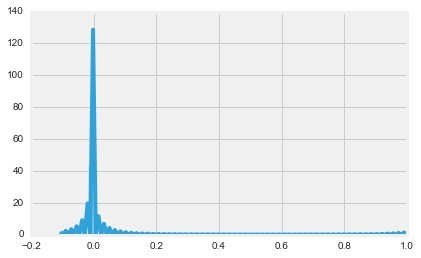

In [76]:
residuals=result.resid
sns.distplot(residuals)

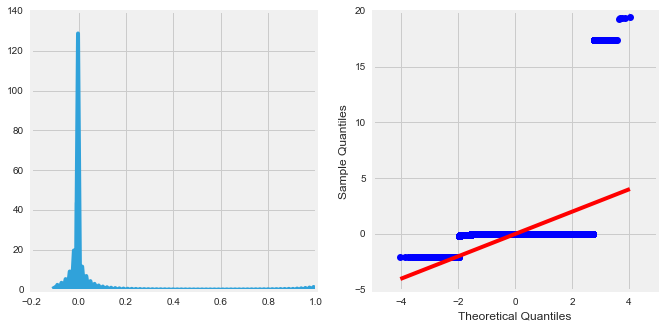

In [77]:
# Checking the residuals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.distplot(residuals, ax=axes[0]);
sm.qqplot(residuals, fit=True, line='s', ax=axes[1]);